In [100]:
import pandas as pd 
from pycaret.regression import *
import shap
import matplotlib.pyplot as plt

# Problem Statement
The performance of concrete is universally determined by its unaxial compressive strength, which is also closely related to other physcial properties of the concrete batch. According to the General Specifications of CEDD. It is required to conduct 1-2 concrete strength test per 100m^3 batch. However, conventional Cube Crushing Test takes too much time, usually up to 28 days or more. Therefore, it may be desirable to obtain a relationship between concrete constituent materials to find its compressive strength. 

In [101]:
df = pd.read_csv('concrete_data.csv')

In [102]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [145]:
reg101 = setup(data=df, target='concrete_compressive_strength', session_id=1)

,Description,Value
0,Session id,1
1,Target,concrete_compressive_strength
2,Target type,Regression
3,Original data shape,"(1030, 9)"
4,Transformed data shape,"(1030, 9)"
5,Transformed train set shape,"(721, 9)"
6,Transformed test set shape,"(309, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


# Model Testing
The models that have been tested are: 

    1. Light Gradient Boositn Machine 
    2. Ensemble Learning with (Lightgbm, ExtraTree Regressor, Gradient Boosting Regressor)

## Linear Regression

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.2041,140.2953,11.8446,0.4078,0.4298,0.4582
1,8.5686,115.9098,10.7661,0.5996,0.3912,0.3620
2,8.0273,90.0727,9.4907,0.7294,0.3165,0.3213
3,7.9652,105.9697,10.2942,0.6048,0.3059,0.2825
4,7.7083,99.8025,9.9901,0.6508,0.3002,0.2740
5,6.8122,70.4590,8.3940,0.7553,0.2583,0.2273
6,7.0799,88.4406,9.4043,0.5809,0.3163,0.2884
7,7.8702,98.0697,9.9030,0.6719,0.3324,0.3144
8,9.7519,145.8633,12.0774,0.5699,0.3527,0.3355


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.2097,140.3837,11.8484,0.4074,0.4301,0.4587
1,8.5920,115.6411,10.7537,0.6006,0.3904,0.3622
2,8.0262,89.5329,9.4622,0.7310,0.3155,0.3208
3,7.9762,105.9234,10.2919,0.6050,0.3065,0.2832
4,7.7056,99.8620,9.9931,0.6506,0.3009,0.2745
5,6.8197,70.5389,8.3987,0.7550,0.2585,0.2275
6,7.0834,88.5553,9.4104,0.5803,0.3164,0.2886
7,7.8882,98.2026,9.9097,0.6715,0.3327,0.3150
8,9.7196,144.1262,12.0053,0.5750,0.3487,0.3320


Fitting 10 folds for each of 2 candidates, totalling 20 fits


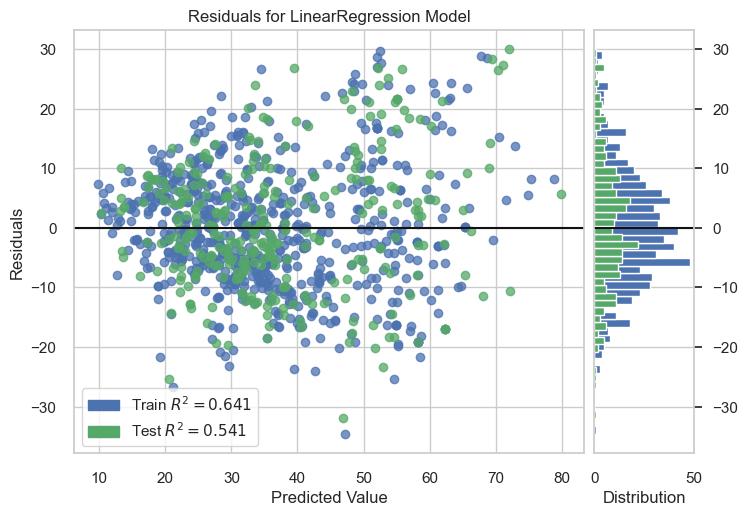

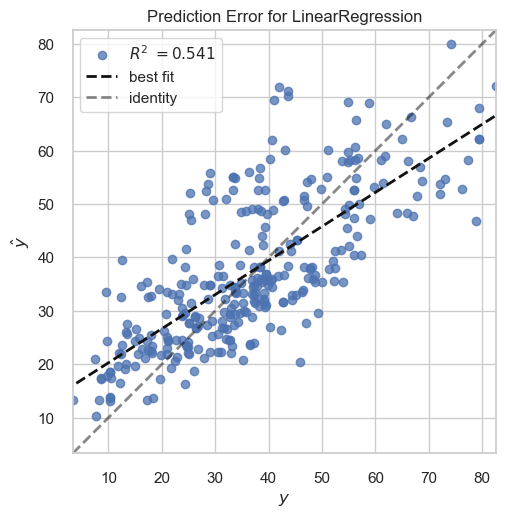

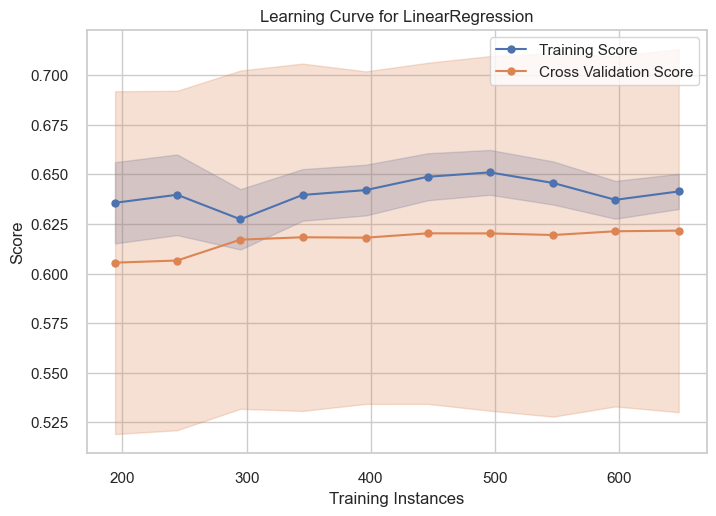

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,8.2191,107.9028,10.3876,0.6130,0.3292,0.3109


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,prediction_label
0,540.000000,0.000000,0.000000,162.000000,2.5,1040.000000,676.000000,28,79.989998,54.542231
1,540.000000,0.000000,0.000000,162.000000,2.5,1055.000000,676.000000,28,61.889999,54.663651
2,332.500000,142.500000,0.000000,228.000000,0.0,932.000000,594.000000,270,40.270000,58.484767
3,332.500000,142.500000,0.000000,228.000000,0.0,932.000000,594.000000,365,41.049999,69.455315
4,198.600006,132.399994,0.000000,192.000000,0.0,978.400024,825.500000,360,44.299999,60.752797
...,...,...,...,...,...,...,...,...,...,...
1025,276.399994,116.000000,90.300003,179.600006,8.9,870.099976,768.299988,28,44.279999,40.966584
1026,322.200012,0.000000,115.599998,196.000000,10.4,817.900024,813.400024,28,31.180000,34.409702
1027,148.500000,139.399994,108.599998,192.699997,6.1,892.400024,780.000000,28,23.700001,26.840785
1028,159.100006,186.699997,0.000000,175.600006,11.3,989.599976,788.900024,28,32.770000,29.397547


In [173]:
linear_regression = create_model('lr')
linear_regression = tune_model(linear_regression,optimize='RMSE')
plot_model(linear_regression, plot='residuals')
plot_model(linear_regression, plot='error')
plot_model(linear_regression, plot='learning')
predict_model(linear_regression, df)

## EXTRA: Lasso Regression

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.2096,140.1443,11.8383,0.4084,0.4313,0.4604
1,8.5673,115.7571,10.7590,0.6002,0.3916,0.3627
2,8.0409,90.3820,9.5069,0.7284,0.3187,0.3239
3,7.9663,106.1741,10.3041,0.6040,0.3077,0.2848
4,7.7089,99.9903,9.9995,0.6502,0.3028,0.2763
5,6.8051,70.3144,8.3854,0.7558,0.2582,0.2277
6,7.0636,88.5085,9.4079,0.5806,0.3171,0.2887
7,7.8682,98.2853,9.9139,0.6712,0.3324,0.3143
8,9.7385,145.5376,12.0639,0.5709,0.3519,0.3345


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.1937,139.8444,11.8256,0.4097,0.4308,0.4594
1,8.5850,115.6113,10.7523,0.6007,0.3914,0.3630
2,8.0428,90.1949,9.4971,0.7290,0.3187,0.3240
3,7.9688,106.2341,10.3070,0.6038,0.3083,0.2854
4,7.7089,100.0518,10.0026,0.6499,0.3034,0.2768
5,6.7758,70.0041,8.3668,0.7569,0.2576,0.2267
6,7.0547,88.3017,9.3969,0.5815,0.3170,0.2884
7,7.8698,98.3462,9.9170,0.6710,0.3324,0.3143
8,9.7139,144.3247,12.0135,0.5744,0.3491,0.3319


Fitting 10 folds for each of 10 candidates, totalling 100 fits


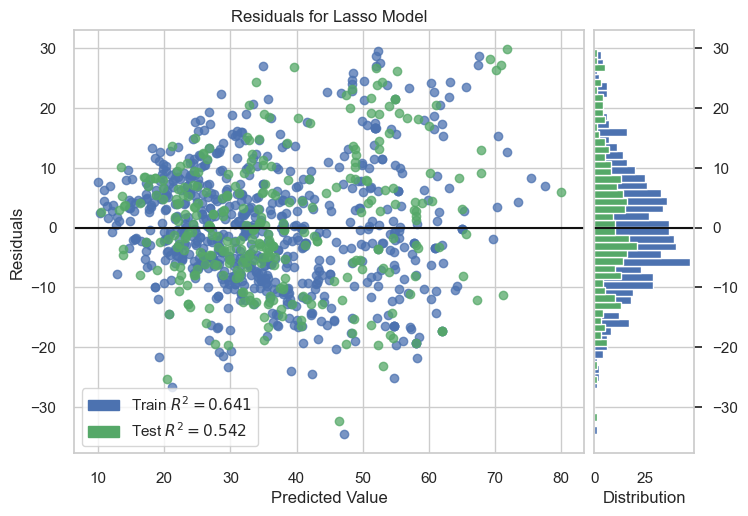

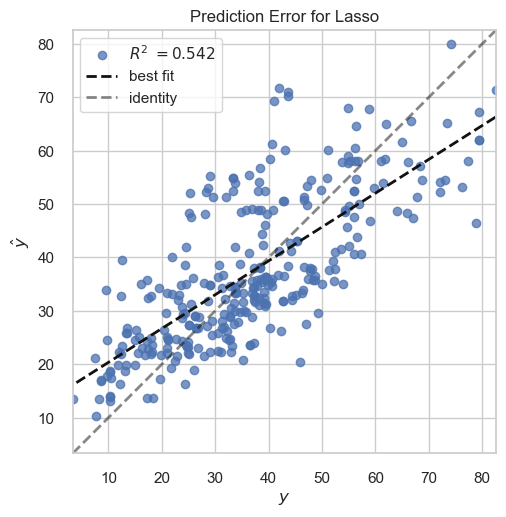

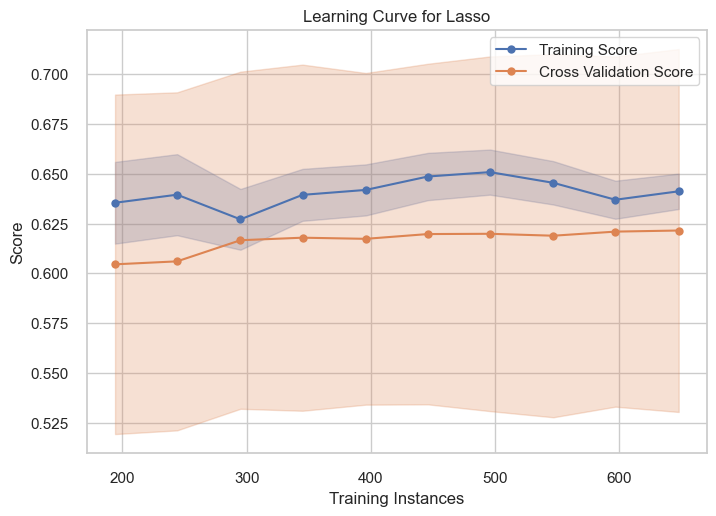

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,8.2099,107.8314,10.3842,0.6132,0.3300,0.3114


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,prediction_label
0,540.000000,0.000000,0.000000,162.000000,2.5,1040.000000,676.000000,28,79.989998,54.808370
1,540.000000,0.000000,0.000000,162.000000,2.5,1055.000000,676.000000,28,61.889999,54.921946
2,332.500000,142.500000,0.000000,228.000000,0.0,932.000000,594.000000,270,40.270000,58.398502
3,332.500000,142.500000,0.000000,228.000000,0.0,932.000000,594.000000,365,41.049999,69.322931
4,198.600006,132.399994,0.000000,192.000000,0.0,978.400024,825.500000,360,44.299999,60.815416
...,...,...,...,...,...,...,...,...,...,...
1025,276.399994,116.000000,90.300003,179.600006,8.9,870.099976,768.299988,28,44.279999,41.014880
1026,322.200012,0.000000,115.599998,196.000000,10.4,817.900024,813.400024,28,31.180000,34.332978
1027,148.500000,139.399994,108.599998,192.699997,6.1,892.400024,780.000000,28,23.700001,26.930008
1028,159.100006,186.699997,0.000000,175.600006,11.3,989.599976,788.900024,28,32.770000,28.901373


In [175]:
linear_regression = create_model('lasso')
linear_regression = tune_model(linear_regression,optimize='RMSE')
plot_model(linear_regression, plot='residuals')
plot_model(linear_regression, plot='error')
plot_model(linear_regression, plot='learning')
predict_model(linear_regression, df)

## Random Forest 

In [169]:
random_forest = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.5653,33.5857,5.7953,0.8582,0.2332,0.1784
1,2.9141,16.0904,4.0113,0.9444,0.1677,0.1258
2,3.4524,21.6341,4.6513,0.9350,0.1494,0.1183
3,3.6191,20.5440,4.5325,0.9234,0.1537,0.1307
4,4.3450,41.6956,6.4572,0.8541,0.1567,0.1184
5,3.5709,19.5393,4.4203,0.9321,0.1367,0.1116
6,3.6706,29.5952,5.4401,0.8598,0.1713,0.1255
7,3.5108,24.6952,4.9694,0.9174,0.1823,0.1438
8,4.4205,46.3726,6.8097,0.8633,0.1836,0.1400


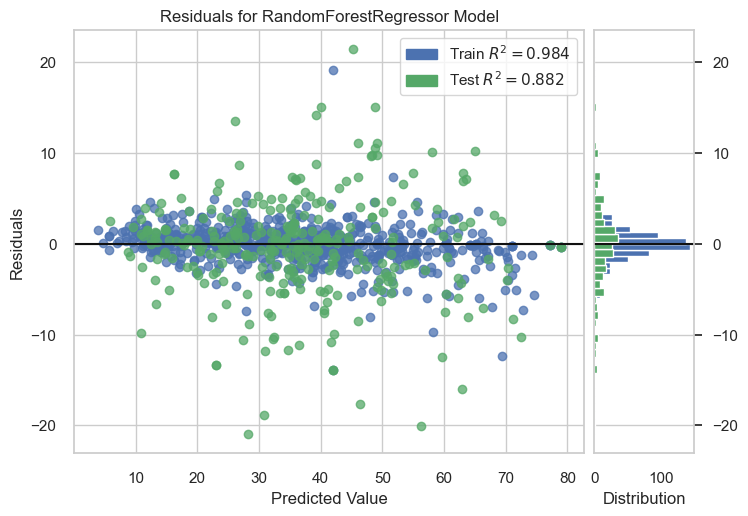

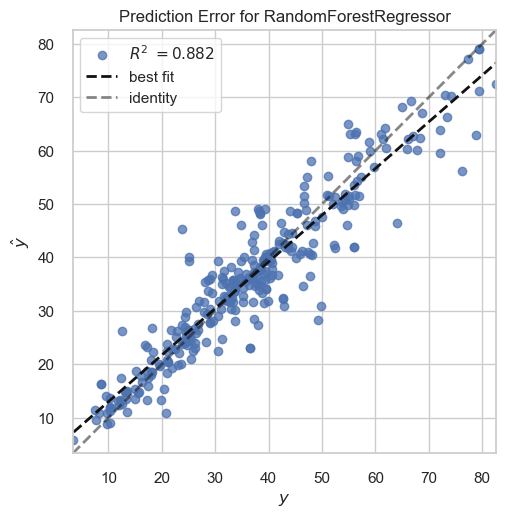

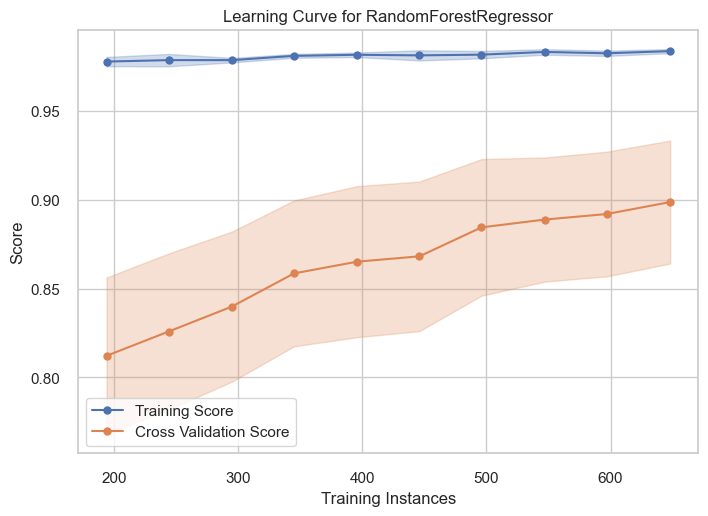

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2.1383,12.4601,3.5299,0.9553,0.1088,0.0716


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,prediction_label
0,540.000000,0.000000,0.000000,162.000000,2.5,1040.000000,676.000000,28,79.989998,72.761698
1,540.000000,0.000000,0.000000,162.000000,2.5,1055.000000,676.000000,28,61.889999,65.496399
2,332.500000,142.500000,0.000000,228.000000,0.0,932.000000,594.000000,270,40.270000,40.925001
3,332.500000,142.500000,0.000000,228.000000,0.0,932.000000,594.000000,365,41.049999,41.296101
4,198.600006,132.399994,0.000000,192.000000,0.0,978.400024,825.500000,360,44.299999,42.997000
...,...,...,...,...,...,...,...,...,...,...
1025,276.399994,116.000000,90.300003,179.600006,8.9,870.099976,768.299988,28,44.279999,43.775499
1026,322.200012,0.000000,115.599998,196.000000,10.4,817.900024,813.400024,28,31.180000,35.128900
1027,148.500000,139.399994,108.599998,192.699997,6.1,892.400024,780.000000,28,23.700001,23.564501
1028,159.100006,186.699997,0.000000,175.600006,11.3,989.599976,788.900024,28,32.770000,33.049499


In [170]:
plot_model(random_forest, plot='residuals')
plot_model(random_forest, plot='error')
plot_model(random_forest, plot='learning')
predict_model(random_forest, df)

## ANN

In [178]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler()
X1 = sc1.fit_transform(X)
y1 = sc1.fit_transform(y)

In [179]:
# Building NN 
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [180]:
# Setting up the Loss Function and Optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

In [183]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# Train the model 
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=0)

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)

# Print the evaluation result
print("Test Loss:", loss)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 28.9679 - mean_squared_error: 29.2039 
Test Loss: [30.158599853515625, 31.102693557739258]


In [182]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_squared_error'])


KeyError: 'accuracy'

## Adaboost

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.6230,58.5610,7.6525,0.7528,0.3386,0.3148
1,5.7739,46.6013,6.8265,0.8390,0.3066,0.2892
2,6.2212,53.5894,7.3205,0.8390,0.2661,0.2574
3,6.2850,59.5783,7.7187,0.7778,0.2915,0.2739
4,6.5642,65.0294,8.0641,0.7725,0.2617,0.2399
5,5.3087,41.6215,6.4515,0.8554,0.2042,0.1809
6,6.1106,56.4204,7.5114,0.7326,0.2537,0.2331
7,6.5819,58.2930,7.6350,0.8050,0.3156,0.3099
8,6.9437,73.0898,8.5493,0.7845,0.2702,0.2566


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.4569,54.8167,7.4038,0.7686,0.3394,0.3161
1,5.7924,46.4792,6.8176,0.8395,0.3147,0.2991
2,6.2619,53.3828,7.3063,0.8396,0.2809,0.2729
3,6.1739,57.1784,7.5616,0.7868,0.2839,0.2653
4,6.9893,72.6542,8.5237,0.7458,0.2733,0.2543
5,5.1663,39.6078,6.2935,0.8624,0.2068,0.1806
6,6.1171,55.5222,7.4513,0.7369,0.2567,0.2374
7,6.3124,56.5967,7.5231,0.8107,0.3133,0.3023
8,6.8696,72.7042,8.5267,0.7856,0.2665,0.2507


Fitting 10 folds for each of 10 candidates, totalling 100 fits


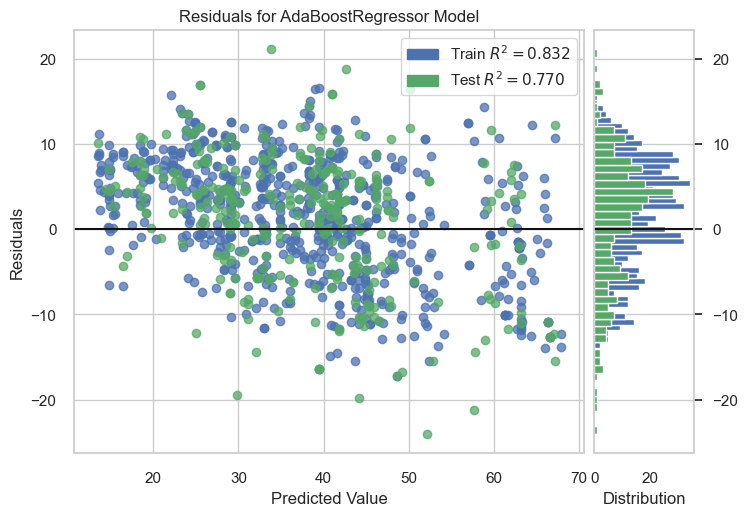

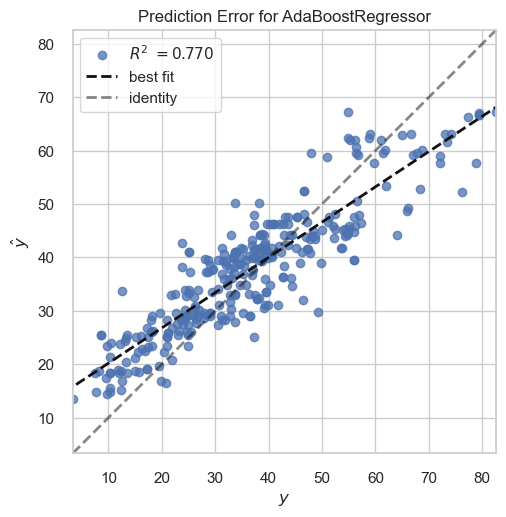

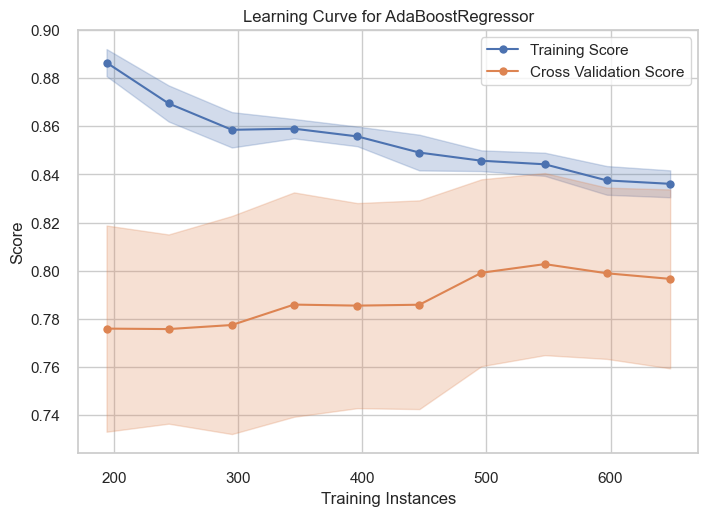

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,5.9817,51.6724,7.1883,0.8147,0.2670,0.2471


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,prediction_label
0,540.000000,0.000000,0.000000,162.000000,2.5,1040.000000,676.000000,28,79.989998,66.012889
1,540.000000,0.000000,0.000000,162.000000,2.5,1055.000000,676.000000,28,61.889999,66.012889
2,332.500000,142.500000,0.000000,228.000000,0.0,932.000000,594.000000,270,40.270000,46.183548
3,332.500000,142.500000,0.000000,228.000000,0.0,932.000000,594.000000,365,41.049999,46.183548
4,198.600006,132.399994,0.000000,192.000000,0.0,978.400024,825.500000,360,44.299999,35.884667
...,...,...,...,...,...,...,...,...,...,...
1025,276.399994,116.000000,90.300003,179.600006,8.9,870.099976,768.299988,28,44.279999,44.586297
1026,322.200012,0.000000,115.599998,196.000000,10.4,817.900024,813.400024,28,31.180000,41.793362
1027,148.500000,139.399994,108.599998,192.699997,6.1,892.400024,780.000000,28,23.700001,28.274043
1028,159.100006,186.699997,0.000000,175.600006,11.3,989.599976,788.900024,28,32.770000,32.906087


In [172]:
adaboost = create_model('ada')
adaboost = tune_model(adaboost,optimize='RMSE')
plot_model(adaboost, plot='residuals')
plot_model(adaboost, plot='error')
plot_model(adaboost, plot='learning')
predict_model(adaboost, df)

## Light GBM 

In [155]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.3089,23.4762,4.7809,0.9155,0.1535,0.1154,0.4990
gbr,Gradient Boosting Regressor,3.7882,26.6305,5.1133,0.9042,0.1668,0.1331,0.0690
et,Extra Trees Regressor,3.2392,26.3927,5.0508,0.9031,0.1589,0.1143,0.0450
rf,Random Forest Regressor,3.6900,28.2274,5.2428,0.8981,0.1699,0.1323,0.0690
dt,Decision Tree Regressor,4.7607,57.3413,7.4049,0.7951,0.2363,0.1655,0.0050
ada,AdaBoost Regressor,6.1616,57.0373,7.5318,0.7943,0.2780,0.2605,0.0370
knn,K Neighbors Regressor,7.1524,87.5431,9.2998,0.6872,0.3137,0.2801,0.0080
ridge,Ridge Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.0080
lar,Least Angle Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.0060
lr,Linear Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.7050


LGBMRegressor(n_jobs=-1, random_state=1)

In [141]:
lightgbm = create_model('lightgbm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:29:20
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1518,19.7625,4.4455,0.9288,0.1783,0.1314
1,2.7067,16.0543,4.0068,0.9337,0.1620,0.1171
2,2.8942,24.0939,4.9086,0.9140,0.1861,0.1293
3,2.7206,13.7125,3.7030,0.9558,0.1289,0.0978
4,3.3683,24.4087,4.9405,0.9136,0.1407,0.1054
5,3.3548,21.9338,4.6834,0.9197,0.1563,0.1002
6,2.8803,17.0569,4.1300,0.9356,0.1245,0.0876
7,3.0403,17.0189,4.1254,0.9246,0.1441,0.1097
8,3.9340,40.6537,6.3760,0.8897,0.1866,0.1389


In [107]:
# lightgbm_tuned = tune_model(lightgbm)

In [108]:
# print(lightgbm_tuned)

In [109]:
# plot_model(lightgbm_tuned)

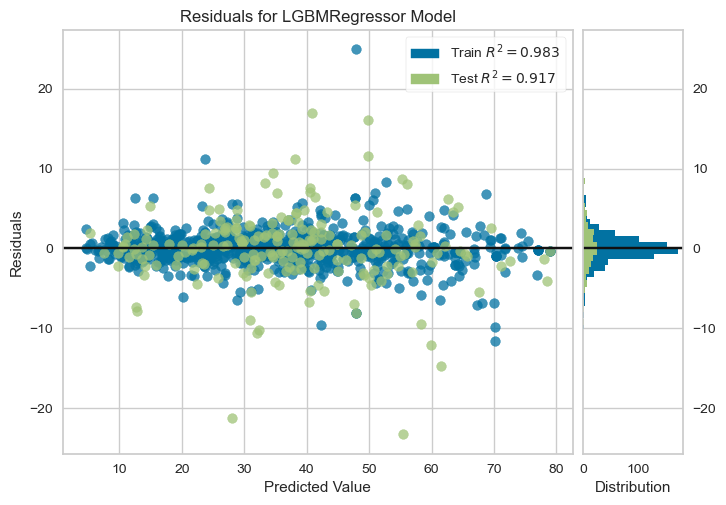

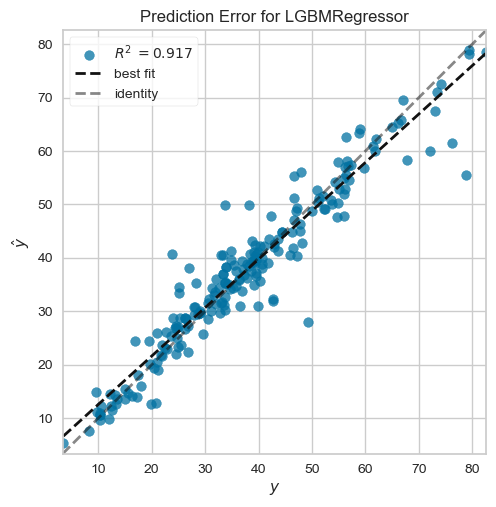

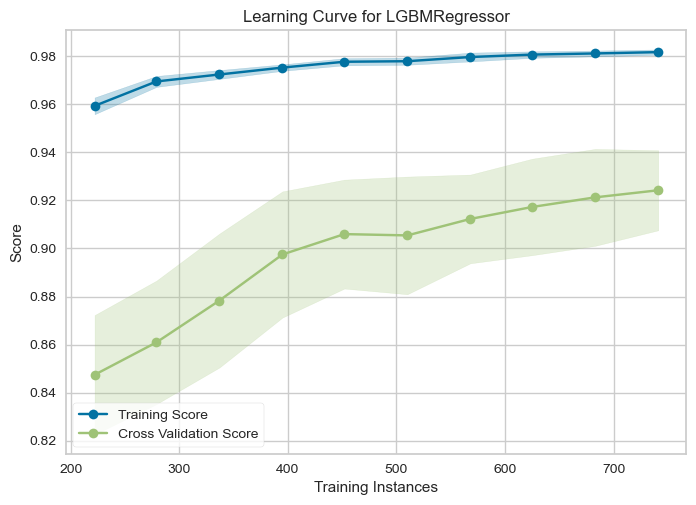

In [144]:
plot_model(lightgbm, plot='residuals')
plot_model(lightgbm, plot='error')
plot_model(lightgbm, plot='learning')

In [112]:
predict_model(lightgbm)
# predict_model(lightgbm_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.2899,23.2918,4.8262,0.9111,0.1505,0.1076


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,prediction_label
339,297.200012,0.000000,117.500000,174.800003,9.5,1022.799988,753.500000,3,21.910000,19.164950
244,238.100006,0.000000,94.099998,186.699997,7.0,949.900024,847.000000,3,19.930000,11.623227
882,140.000000,133.000000,103.000000,200.000000,7.0,916.000000,753.000000,28,36.439999,20.623996
567,203.500000,135.699997,0.000000,185.699997,0.0,1076.199951,759.299988,7,11.960000,11.080451
923,162.000000,207.000000,172.000000,216.000000,10.0,822.000000,638.000000,28,39.840000,31.221933
...,...,...,...,...,...,...,...,...,...,...
1018,321.399994,0.000000,127.900002,182.500000,11.5,870.099976,779.700012,28,37.270000,39.242313
1015,322.500000,148.600006,0.000000,185.800003,8.5,951.000000,709.500000,28,52.430000,49.276198
341,297.200012,0.000000,117.500000,174.800003,9.5,1022.799988,753.500000,28,47.400002,39.897559
750,500.000000,0.000000,0.000000,200.000000,0.0,1125.000000,613.000000,28,44.090000,44.007172


## Ensemble Top 3 

In [113]:
best_rmse_models_top3 = compare_models(sort = 'RMSE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.3089,23.4762,4.7809,0.9155,0.1535,0.1154,0.5240
et,Extra Trees Regressor,3.2392,26.3927,5.0508,0.9031,0.1589,0.1143,0.0300
gbr,Gradient Boosting Regressor,3.7882,26.6305,5.1133,0.9042,0.1668,0.1331,0.0460
rf,Random Forest Regressor,3.6900,28.2274,5.2428,0.8981,0.1699,0.1323,0.0550
dt,Decision Tree Regressor,4.7607,57.3413,7.4049,0.7951,0.2363,0.1655,0.0060
ada,AdaBoost Regressor,6.1616,57.0373,7.5318,0.7943,0.2780,0.2605,0.0210
knn,K Neighbors Regressor,7.1524,87.5431,9.2998,0.6872,0.3137,0.2801,0.0100
lar,Least Angle Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.0080
ridge,Ridge Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.0060
lr,Linear Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.0260


In [114]:
best_rmse_models_top3

[LGBMRegressor(n_jobs=-1, random_state=1),
 ExtraTreesRegressor(n_jobs=-1, random_state=1),
 GradientBoostingRegressor(random_state=1)]

In [115]:
blend_models(best_rmse_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0087,29.1496,5.3990,0.8770,0.2017,0.1450
1,2.6940,13.9813,3.7392,0.9517,0.1684,0.1222
2,2.8140,15.0272,3.8765,0.9548,0.1214,0.0957
3,3.0861,14.6178,3.8233,0.9455,0.1255,0.1065
4,3.5945,30.4387,5.5171,0.8935,0.1292,0.0970
5,2.9391,15.0270,3.8765,0.9478,0.1164,0.0907
6,3.3275,23.3359,4.8307,0.8894,0.1481,0.1114
7,3.2413,19.8045,4.4502,0.9338,0.1593,0.1268
8,4.1016,38.5864,6.2118,0.8862,0.1674,0.1268


VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=1)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=1)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=1))],
                n_jobs=-1)

In [116]:
stacker = stack_models(best_rmse_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9457,29.0805,5.3926,0.8772,0.1935,0.1376
1,2.4905,13.0780,3.6164,0.9548,0.1545,0.1100
2,2.7743,14.7595,3.8418,0.9557,0.1252,0.0939
3,2.9952,14.5624,3.8161,0.9457,0.1218,0.1005
4,3.5455,29.6022,5.4408,0.8964,0.1300,0.0963
5,3.0554,16.7308,4.0903,0.9419,0.1253,0.0942
6,3.3285,26.2964,5.1280,0.8754,0.1530,0.1092
7,3.0163,17.6173,4.1973,0.9411,0.1476,0.1137
8,3.9821,37.3776,6.1137,0.8898,0.1652,0.1232


In [117]:
stacker

StackingRegressor(cv=5,
                  estimators=[('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=1)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1, random_state=1)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

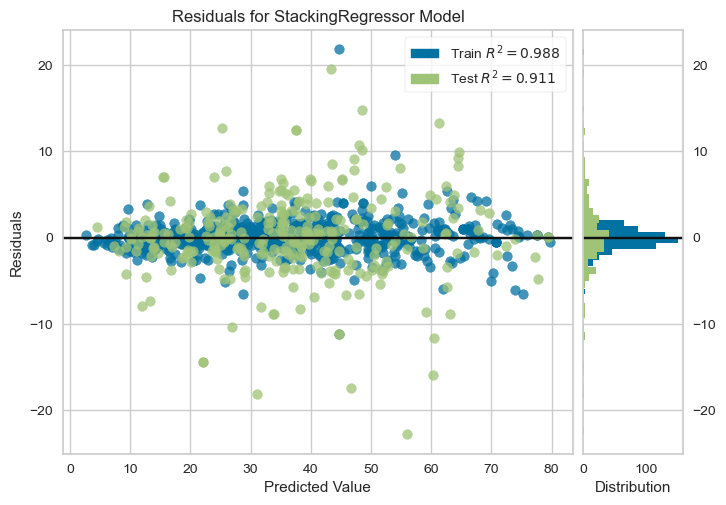

In [118]:
plot_model(stacker, plot='residuals')

https://astrobenhart.medium.com/how-to-use-shap-with-pycaret-dc9a31278621

In [119]:
df = pd.read_csv('concrete_data.csv')

In [120]:
reg101 = setup(data=df, target='concrete_compressive_strength', session_id=1,train_size=0.8)

,Description,Value
0,Session id,1
1,Target,concrete_compressive_strength
2,Target type,Regression
3,Original data shape,"(1030, 9)"
4,Transformed data shape,"(1030, 9)"
5,Transformed train set shape,"(824, 9)"
6,Transformed test set shape,"(206, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


## Ensemble Top 5

In [121]:
top5 = compare_models(n_select=5,sort='RMSE')
tuned_top5 = [tune_model(i, optimize='RMSE') for i in top5]
# ensem_top5 = [ensemble_model(i, n_estimators = 10, optimize='RMSE') for i in tuned_top5]
blend = blend_models(tuned_top5, optimize='RMSE')
# blend_ensem = blend_models(ensem_top5, optimize='RMSE')
# model = automl(optimize='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.1388,21.7581,4.6103,0.9231,0.1537,0.1120,0.6570
et,Extra Trees Regressor,3.1224,24.0036,4.8456,0.9149,0.1530,0.1109,0.0310
gbr,Gradient Boosting Regressor,3.7540,25.3993,5.0110,0.9090,0.1625,0.1303,0.0260
rf,Random Forest Regressor,3.5166,26.5611,5.0891,0.9065,0.1693,0.1283,0.0510
dt,Decision Tree Regressor,4.3412,48.0636,6.7711,0.8331,0.2212,0.1529,0.0040
ada,AdaBoost Regressor,6.3155,58.8828,7.6330,0.7890,0.2854,0.2698,0.0170
knn,K Neighbors Regressor,7.1024,86.3731,9.2318,0.6930,0.3136,0.2782,0.0050
lar,Least Angle Regression,8.0984,105.8964,10.2150,0.6219,0.3310,0.3151,0.0040
ridge,Ridge Regression,8.0984,105.8964,10.2150,0.6219,0.3310,0.3151,0.0030
lr,Linear Regression,8.0984,105.8964,10.2150,0.6219,0.3310,0.3151,0.0120


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9555,20.4511,4.5223,0.9263,0.1864,0.1251
1,2.6732,15.3974,3.9240,0.9365,0.1469,0.1083
2,2.7165,22.8270,4.7778,0.9185,0.1553,0.1062
3,2.6545,11.4935,3.3902,0.9630,0.1589,0.1016
4,3.3121,23.3066,4.8277,0.9175,0.1436,0.1088
5,3.0655,22.0702,4.6979,0.9192,0.1466,0.0958
6,3.0071,17.1646,4.1430,0.9352,0.1295,0.0942
7,2.6074,12.6018,3.5499,0.9441,0.1325,0.0942
8,3.2889,27.8226,5.2747,0.9245,0.1752,0.1242


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.4109,66.3177,8.1436,0.7611,0.2983,0.2763
1,6.2414,63.5786,7.9736,0.7376,0.3352,0.3173
2,6.5097,65.6304,8.1013,0.7658,0.3262,0.3095
3,6.2619,53.0542,7.2838,0.8291,0.2975,0.2858
4,6.7177,70.2266,8.3801,0.7514,0.2565,0.2324
5,6.0170,54.4281,7.3775,0.8007,0.2502,0.2243
6,5.5954,48.6065,6.9718,0.8166,0.2275,0.1943
7,5.7908,48.3656,6.9545,0.7856,0.2814,0.2621
8,7.1701,85.1247,9.2263,0.7691,0.2913,0.2732


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9115,15.4006,3.9244,0.9445,0.1374,0.1080
1,2.9761,19.6276,4.4303,0.9190,0.1551,0.1149
2,3.1886,24.1985,4.9192,0.9137,0.1757,0.1304
3,2.7999,13.2963,3.6464,0.9572,0.1288,0.0952
4,3.1370,21.1056,4.5941,0.9253,0.1304,0.1004
5,3.3320,19.3800,4.4023,0.9290,0.1297,0.0990
6,2.9681,16.7889,4.0974,0.9366,0.1283,0.0937
7,3.0427,15.2121,3.9003,0.9326,0.1456,0.1170
8,3.6691,31.1418,5.5805,0.9155,0.1628,0.1239


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4186,33.7016,5.8053,0.8786,0.2193,0.1811
1,3.8189,26.9047,5.1870,0.8890,0.2267,0.1826
2,3.9137,30.6475,5.5360,0.8906,0.2230,0.1764
3,3.7021,21.8782,4.6774,0.9295,0.1689,0.1442
4,4.8176,42.8279,6.5443,0.8484,0.1826,0.1536
5,4.0662,26.9282,5.1892,0.9014,0.1548,0.1321
6,3.9505,25.9613,5.0952,0.9020,0.1540,0.1247
7,4.1055,28.9488,5.3804,0.8717,0.1981,0.1650
8,5.2765,56.8989,7.5431,0.8456,0.2116,0.1788


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.8178,64.5210,8.0325,0.7675,0.2463,0.2039
1,5.1470,43.5903,6.6023,0.8201,0.2391,0.2055
2,5.4208,62.4416,7.9020,0.7772,0.2545,0.2068
3,4.8868,36.2900,6.0241,0.8831,0.2184,0.1901
4,6.0000,64.9537,8.0594,0.7700,0.2380,0.1879
5,5.3800,55.3634,7.4407,0.7973,0.2183,0.1611
6,4.8599,44.0340,6.6358,0.8338,0.2007,0.1555
7,4.8236,44.1505,6.6446,0.8043,0.2402,0.1875
8,6.6575,116.5011,10.7936,0.6840,0.2943,0.2137


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3065,21.3156,4.6169,0.9232,0.1632,0.1246
1,2.6811,17.2861,4.1577,0.9287,0.1593,0.1165
2,2.6455,22.8296,4.7780,0.9185,0.1686,0.1146
3,2.6356,12.8898,3.5902,0.9585,0.1217,0.0936
4,2.9577,18.2843,4.2760,0.9353,0.1171,0.0917
5,3.2155,20.7202,4.5519,0.9241,0.1323,0.0936
6,3.0507,20.0049,4.4727,0.9245,0.1406,0.0976
7,2.5454,11.7040,3.4211,0.9481,0.1267,0.0987
8,3.9460,44.5588,6.6752,0.8791,0.1870,0.1352


In [139]:
model

Pipeline(memory=FastMemory(location=/var/folders/py/yncddnwd6kn7d9dzfmz1kcbm0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['cement', 'blast_furnace_slag',
                                             'fly_ash', 'water',
                                             'superplasticizer',
                                             'coarse_aggregate',
                                             'fine_aggregate ', 'age'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transfor...
                                             ('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(learning_rate=0.05,
                                                                        max_depth=4,
                                                                        max_features='sqrt',
                                                                        min_impurity_decrease=0.05,
                                                                        min_samples_leaf=2,
                                                                        min_samples_split=4,
                                                                        n_estimators=260,
                                                                        random_state=1,
                                                                        subsample=0.8)),
                                             ('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=1)),
                                             ('Decision Tree Regressor',
                                              DecisionTreeRegressor(random_state=1))],
                                 n_jobs=-1))])

In [138]:
model = saved_model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.8329,1.4931,1.2219,0.9943,0.0347,0.0251


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


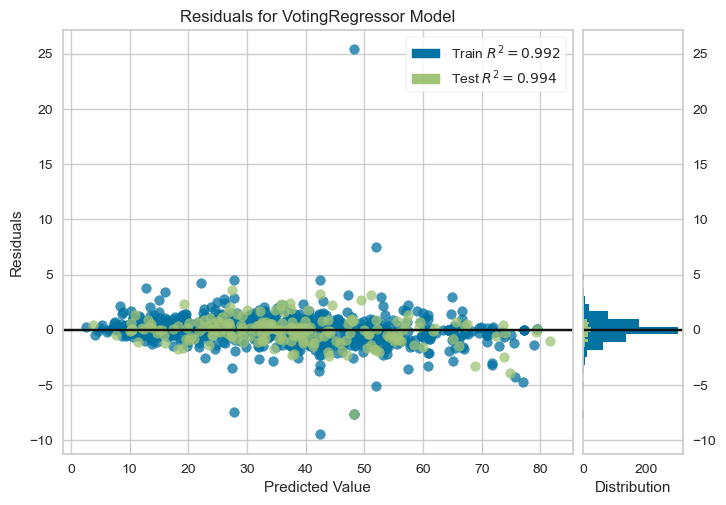

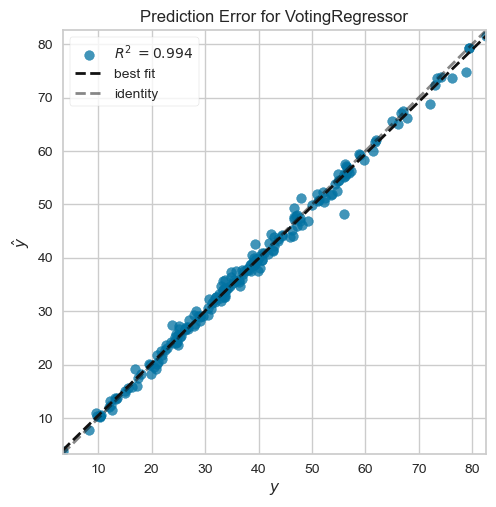

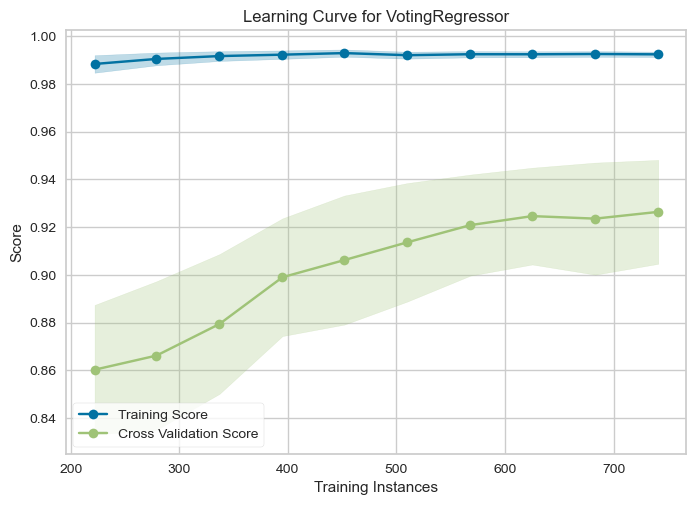

In [140]:
predict_model(model)
plot_model(model ,plot='residuals')
plot_model(model ,plot='error')
plot_model(model ,plot='learning',)

In [124]:
final_model = finalize_model(model)
save_model(final_model, 'concrete_UCS')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['cement', 'blast_furnace_slag',
                                              'fly_ash', 'water',
                                              'superplasticizer',
                                              'coarse_aggregate',
                                              'fine_aggregate ', 'age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_c...
                                              ('Gradient Boosting Regressor',
                                               GradientBoostingRegressor(learning_rate=0.05,
                                                                         max_depth=4,
                                   

In [125]:
saved_model = load_model('concrete_UCS')

Transformation Pipeline and Model Successfully Loaded


In [127]:
train_pipe = saved_model[:-1].transform(df)

In [128]:
print(saved_model)

Pipeline(memory=FastMemory(location=/var/folders/py/yncddnwd6kn7d9dzfmz1kcbm0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['cement', 'blast_furnace_slag',
                                             'fly_ash', 'water',
                                             'superplasticizer',
                                             'coarse_aggregate',
                                             'fine_aggregate ', 'age'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transfor...
                                             ('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(learning_rate=0.05,
                                                                        max_depth=4,
                                                                   

In [129]:
print(saved_model.named_steps)

{'numerical_imputer': TransformerWrapper(include=['cement', 'blast_furnace_slag', 'fly_ash', 'water',
                            'superplasticizer', 'coarse_aggregate',
                            'fine_aggregate ', 'age'],
                   transformer=SimpleImputer()), 'categorical_imputer': TransformerWrapper(include=[],
                   transformer=SimpleImputer(strategy='most_frequent')), 'clean_column_names': TransformerWrapper(transformer=CleanColumnNames()), 'actual_estimator': VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(bagging_fraction=0.8, bagging_freq=3,
                                           feature_fraction=0.5,
                                           learning_rate=0.3,
                                           min_child_samples=26,
                                           min_split_gain=0.8, n_estimators=230,
                                           n_jobs=-1, num_leaves=100,
                 

In [130]:
print(saved_model.named_steps["actual_estimator"])

VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(bagging_fraction=0.8, bagging_freq=3,
                                           feature_fraction=0.5,
                                           learning_rate=0.3,
                                           min_child_samples=26,
                                           min_split_gain=0.8, n_estimators=230,
                                           n_jobs=-1, num_leaves=100,
                                           random_state=1, reg_alpha=0.005,
                                           reg_lambda=4)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=1)),
                            ('G...egressor',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       max_depth=4,
                                                       ma

In [131]:
print(type(lightgbm))
print(type(blend))
print(type(tuned_top5[1]))

<class 'lightgbm.sklearn.LGBMRegressor'>
<class 'sklearn.ensemble._voting.VotingRegressor'>
<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>


# Model Interpretation

In [132]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


# * Single Model
# model = lightgbm
model = tuned_top5[1]
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# * Ensemble Models
# model = blend
# explainer = shap.TreeExplainer(model, X)
# shap_values = explainer(X)


 97%|=================== | 995/1030 [00:24<00:00]       

In [133]:
shap.initjs()
concrete_index = 0
print(shap_values)
# print(shap_values[concrete_index,:])
# print(df.iloc[concrete_index,:].to_numpy())
shap.force_plot(explainer.expected_value, shap_values.values[concrete_index], shap_values.data[concrete_index])

.values =
array([[ 21.6653478 ,   0.1138418 ,   1.91004103, ...,   2.33522765,
          1.95544972,   5.77083842],
       [ 17.45552952,  -0.6694193 ,   1.13238611, ...,  -2.94939622,
          1.01911652,   4.0870394 ],
       [  0.88890912,   1.25949852,   0.31643864, ...,   0.06200774,
         -0.81270604,  10.42357939],
       ...,
       [-16.72368756,   4.40011698,  -0.19503075, ...,   0.32211301,
         -0.25315762,   0.44059112],
       [-16.00255431,   6.3535814 ,   0.20562199, ...,   0.30830785,
          0.03436033,   1.1473301 ],
       [ -4.23941475,   1.53043015,  -1.18880984, ...,  -0.07652417,
         -0.09254309,   2.2847689 ]])

.base_values =
array([37.18062205, 37.18062205, 37.18062205, ..., 37.18062205,
       37.18062205, 37.18062205])

.data =
array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139

In [134]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values, shap_values.data)

<class 'shap._explanation.Explanation'>


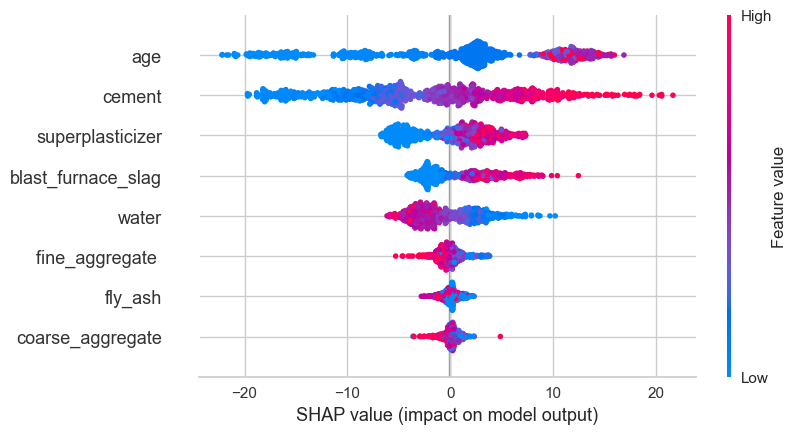

In [135]:
print(type(shap_values))
shap.plots.beeswarm(shap_values)


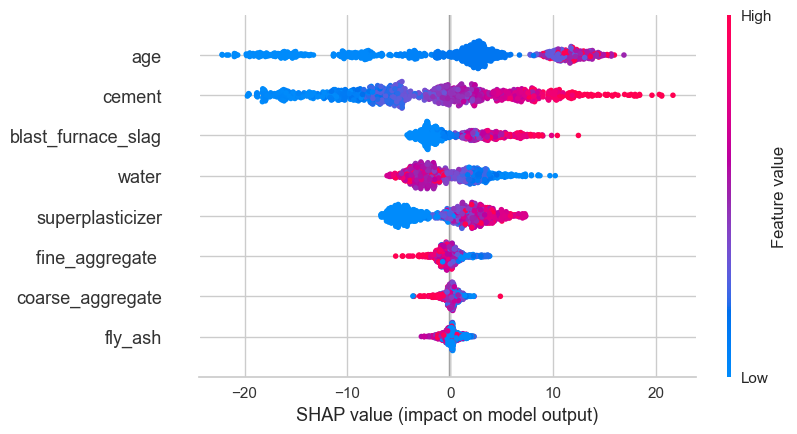

In [136]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

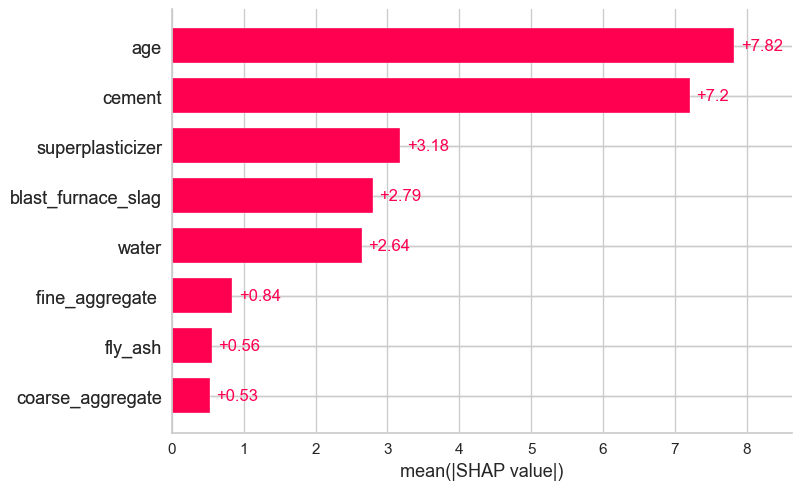

In [137]:
shap.plots.bar(shap_values.abs.mean(0))